In [1]:
from pathlib import Path

import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from src.data.drive import tf_random_crop, tf_random_rotate, get_dataset

In [2]:
data_path = Path("/home/valentin/python_wkspce/2d_bispectrum_cnn/data/raw/drive")
image_dir = data_path / "train/images"
mask_dir = data_path / "train/1st_manual"
segmentation_dir = data_path / "train/images"

In [3]:
image_id=21

In [4]:
image = Image.open(str(
    (image_dir / f"{image_id}_training.tif").resolve()))
image = np.array(image)


In [5]:
def normalize(input_image):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image



In [6]:
img_path = "/home/valentin/python_wkspce/2d_bispectrum_cnn/data/raw/drive/train/images/21_training.tif"
image = tf.io.read_file(img_path)
image = tfio.experimental.image.decode_tiff(image)[:,:,:3]
image = normalize(image)

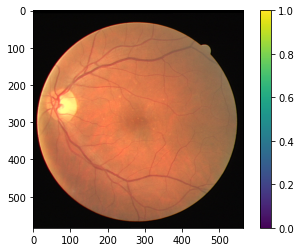

In [7]:
plt.imshow(image.numpy())
plt.colorbar()

In [8]:
mask_path = "/home/valentin/python_wkspce/2d_bispectrum_cnn/data/raw/drive/train/mask/21_training_mask.gif"
mask = tf.io.read_file(mask_path)
mask = tf.io.decode_image(mask)[0,...]
mask = tf.image.rgb_to_grayscale(mask)
mask = tf.where(mask>0, x=1.0, y=0.0)
mask.shape

TensorShape([584, 565, 1])

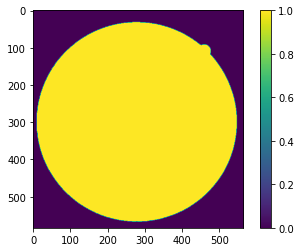

In [9]:
plt.imshow(np.squeeze(mask.numpy()))
plt.colorbar()

In [10]:
image = image * mask

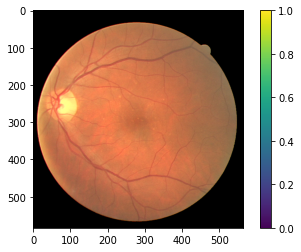

In [11]:
plt.imshow(image.numpy())
plt.colorbar()

In [12]:
image.shape

TensorShape([584, 565, 3])

In [13]:
segmentation_path = "/home/valentin/python_wkspce/2d_bispectrum_cnn/data/raw/drive/train/1st_manual/21_manual1.gif"
segmentation = tf.io.read_file(segmentation_path)
segmentation = tf.io.decode_image(segmentation)[0, ...]
segmentation = tf.image.rgb_to_grayscale(segmentation)
segmentation = tf.where(segmentation>0, x=1.0, y=0.0)

In [14]:
segmentation.shape

TensorShape([584, 565, 1])

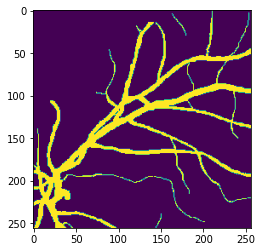

In [15]:
segmentation_cropped = tf.image.crop_to_bounding_box(
    segmentation, 40, 40, 256, 256
)
plt.imshow(segmentation_cropped)

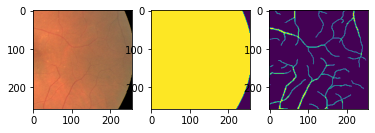

In [17]:
image_cropped, mask_cropped, segmentation_cropped = tf_random_crop(image, mask, segmentation, size=(256,256))
plt.subplot(131)
plt.imshow(image_cropped)
plt.subplot(132)
plt.imshow(mask_cropped)
plt.subplot(133)
plt.imshow(segmentation_cropped)

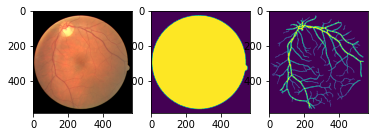

In [18]:
image_rotated, mask_rotated, segmentation_rotated = tf_random_rotate(image, mask, segmentation)
plt.subplot(131)
plt.imshow(image_rotated)
plt.subplot(132)
plt.imshow(mask_rotated)
plt.subplot(133)
plt.imshow(segmentation_rotated)

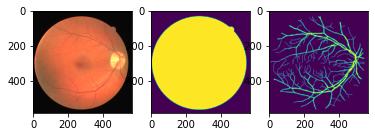

In [24]:
ds = get_dataset().cache()
image, mask, segmentation = next(ds.as_numpy_iterator())
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(segmentation)

In [31]:
f = lambda x: tf.image.resize_with_crop_or_pad(x,592,592)
ds_test =  ds.map(lambda x,y,z: (f(x), f(y), f(z))).cache()

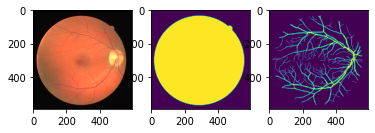

In [32]:
image, mask, segmentation = next(ds_test.as_numpy_iterator())
plt.subplot(131)
plt.imshow(image)
plt.subplot(132)
plt.imshow(mask)
plt.subplot(133)
plt.imshow(segmentation)

In [33]:
mask.shape

(592, 592, 1)